## 09股票走勢分析

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [22]:
# 讓matplotlib顯示中文
import matplotlib as mpl

!rm -rf {mpl.get_cachedir()}
mpl.font_manager._rebuild()

mpl.rc('font', family = 'Noto Sans CJK TC')  # rc通常是run commands的意思，但這裡指的是matplotlib的rc參數rcParams(資料型態是字典)

'rm' 不是內部或外部命令、可執行的程式或批次檔。


查詢歷史股票資料

In [2]:
import twstock

In [3]:
stock = twstock.Stock('2317')

ConnectionError: HTTPConnectionPool(host='www.twse.com.tw', port=80): Max retries exceeded with url: /exchangeReport/STOCK_DAY?date=20210301&stockNo=2317 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000017091420688>: Failed to establish a new connection: [WinError 10061] 無法連線，因為目標電腦拒絕連線。'))

In [3]:
print(stock.price)

[129.5, 124.0, 121.5, 122.5, 123.5, 122.5, 120.0, 120.5, 122.5, 121.5, 121.0, 123.5, 121.5, 122.0, 120.0, 117.5, 119.0, 117.5, 118.5, 117.0, 116.0, 112.5, 108.5, 110.0, 112.5, 117.5, 113.0, 107.0, 102.0, 103.0, 104.5]


In [4]:
print("日期:", stock.date[-1])
print("開盤價:", stock.open[-1])
print("最高價:", stock.high[-1])
print("最低價:", stock.low[-1])
print("收盤價:", stock.close[-1])

日期: 2021-05-14 00:00:00
開盤價: 105.0
最高價: 106.0
最低價: 103.5
收盤價: 104.5


In [8]:
stock.fetch(2019, 1)  # 取得2019年1月的資料

[Data(date=datetime.datetime(2019, 1, 2, 0, 0), capacity=16775306, turnover=1182131473, open=71.4, high=71.4, low=69.9, close=70.1, change=-0.7, transaction=7968),
 Data(date=datetime.datetime(2019, 1, 3, 0, 0), capacity=36659461, turnover=2526323765, open=69.0, high=69.4, low=68.5, close=68.9, change=-1.2, transaction=17345),
 Data(date=datetime.datetime(2019, 1, 4, 0, 0), capacity=37313571, turnover=2520135828, open=68.2, high=68.2, low=67.0, close=67.6, change=-1.3, transaction=18110),
 Data(date=datetime.datetime(2019, 1, 7, 0, 0), capacity=24084557, turnover=1661796863, open=68.7, high=69.4, low=68.3, close=69.3, change=1.7, transaction=11167),
 Data(date=datetime.datetime(2019, 1, 8, 0, 0), capacity=18303188, turnover=1258685500, open=69.6, high=69.6, low=68.2, close=68.6, change=-0.7, transaction=8027),
 Data(date=datetime.datetime(2019, 1, 9, 0, 0), capacity=31946504, turnover=2226173028, open=68.9, high=70.2, low=68.8, close=69.9, change=1.3, transaction=12390),
 Data(date=dat

In [9]:
stock.fetch_31()  # 取得最近31日的資料

[Data(date=datetime.datetime(2021, 3, 30, 0, 0), capacity=47600474, turnover=6154998092, open=129.5, high=130.0, low=128.5, close=129.5, change=1.0, transaction=25886),
 Data(date=datetime.datetime(2021, 3, 31, 0, 0), capacity=132523915, turnover=16524687255, open=125.0, high=126.5, low=123.0, close=124.0, change=-5.5, transaction=80792),
 Data(date=datetime.datetime(2021, 4, 1, 0, 0), capacity=97942681, turnover=11979889015, open=124.5, high=125.5, low=120.5, close=121.5, change=-2.5, transaction=58865),
 Data(date=datetime.datetime(2021, 4, 6, 0, 0), capacity=42038412, turnover=5173429747, open=123.5, high=124.0, low=122.0, close=122.5, change=1.0, transaction=23481),
 Data(date=datetime.datetime(2021, 4, 7, 0, 0), capacity=34046989, turnover=4203938017, open=124.0, high=124.5, low=122.5, close=123.5, change=1.0, transaction=19722),
 Data(date=datetime.datetime(2021, 4, 8, 0, 0), capacity=39136758, turnover=4793168068, open=123.0, high=123.0, low=121.5, close=122.5, change=-1.0, tran

In [ ]:
stock.fetch_from(2019, 10)  # 取得2019年10月至今的資料(目標電腦無法連線)
# 因為資料量太大，很容易被視為攻擊而被鎖定IP而無法連上網站，建議可以分次下載

查詢股票即時交易資訊

In [5]:
real = twstock.realtime.get('2317')

In [6]:
real

{'timestamp': 1620973800.0,
 'info': {'code': '2317',
  'channel': '2317.tw',
  'name': '鴻海',
  'fullname': '鴻海精密工業股份有限公司',
  'time': '2021-05-14 14:30:00'},
 'realtime': {'latest_trade_price': '104.5000',
  'trade_volume': '2140',
  'accumulate_trade_volume': '43426',
  'best_bid_price': ['104.0000',
   '103.5000',
   '103.0000',
   '102.5000',
   '102.0000'],
  'best_bid_volume': ['747', '1180', '2208', '472', '667'],
  'best_ask_price': ['104.5000',
   '105.0000',
   '105.5000',
   '106.0000',
   '106.5000'],
  'best_ask_volume': ['284', '2599', '1242', '2623', '1064'],
  'open': '105.0000',
  'high': '106.0000',
  'low': '103.5000'},
 'success': True}

In [7]:
print(real['realtime']['latest_trade_price'])

104.5000


In [ ]:
if real['scucess']:
    # 處理股票的程式碼
    else:
        print("錯誤", real['rtmessage'])

### 股票分析

In [41]:
import csv
import os

單月個股統計圖

In [10]:
f = 'twstockmonth01.csv'

In [26]:
stock = twstock.Stock('2317')
stocklist = stock.fetch(2021, 1)

In [28]:
title = ["日期", "成交股數", "成交金額", "開盤價", "最高價", "最低價", "收盤價", "漲跌價差", "成交筆數"]
data = []

In [29]:
for stock in stocklist:
    strdate = stock.date.strftime('%Y-%m-%d')  # 將datetime物件轉換為字串
    li = [strdate, stock.capacity, stock.turnover,
    stock.open, stock.high, stock.low, stock.close,
    stock.change, stock.transaction]  # 讀取 日期、成交股數、成交金額、開盤價、最高價、最低價、收盤價、漲跌價差、成交筆數
    data.append(li)       

In [35]:
data

[['2021-01-04', 233726746, 22587972258, 93.4, 100.0, 93.3, 99.9, 7.9, 115789],
 ['2021-01-05',
  234178116,
  24176652664,
  101.0,
  105.0,
  101.0,
  104.0,
  4.1,
  114366],
 ['2021-01-06',
  222119287,
  23465513766,
  107.5,
  109.0,
  102.0,
  105.0,
  1.0,
  114160],
 ['2021-01-07',
  114653734,
  12242829524,
  108.0,
  108.0,
  105.5,
  107.0,
  2.0,
  59013],
 ['2021-01-08',
  115547259,
  12431474200,
  109.0,
  109.5,
  106.0,
  108.0,
  1.0,
  61278],
 ['2021-01-11', 70525408, 7582606654, 108.0, 109.0, 106.5, 107.5, -0.5, 39544],
 ['2021-01-12',
  106622057,
  11119079660,
  106.5,
  107.0,
  103.0,
  104.0,
  -3.5,
  56730],
 ['2021-01-13', 83561136, 8856217204, 105.0, 107.0, 105.0, 106.5, 2.5, 40226],
 ['2021-01-14',
  321271715,
  36391347707,
  109.0,
  117.0,
  108.0,
  116.0,
  9.5,
  141468],
 ['2021-01-15',
  171273151,
  19817867014,
  118.0,
  119.0,
  113.0,
  115.5,
  -0.5,
  86061],
 ['2021-01-18',
  95824657,
  10843315189,
  115.5,
  116.0,
  111.0,
  114.0,

In [34]:
outputfile = open(f, 'w', newline='', encoding='big5')
outputwriter = csv.writer(outputfile)  # 以csv格式寫入檔案
outputwriter.writerow(title)  # 寫入標題
for dataline in (data):  # 寫入資料
    outputwriter.writerow(dataline)
outputfile.close()  # 關閉檔案

In [27]:
stocklist[0]

Data(date=datetime.datetime(2021, 1, 4, 0, 0), capacity=233726746, turnover=22587972258, open=93.4, high=100.0, low=93.3, close=99.9, change=7.9, transaction=115789)

In [30]:
strdate = stock.date.strftime('%Y-%m-%d')

In [31]:
strdate

'2021-01-29'

In [32]:
for stock in stocklist:
    strdate = stock.date.strftime('%Y-%m-%d')  # 將datetime物件轉換為字串
    li = [strdate, stock.capacity, stock.turnover,
          stock.open, stock.high, stock.low, stock.close,
          stock.change, stock.transaction]  # 讀取 日期、成交股數、成交金額、開盤價、最高價、最低價、收盤價、漲跌價差、成交筆數      

In [33]:
li

['2021-01-29', 182193247, 20945648631, 119.0, 120.0, 111.5, 111.5, -7.0, 94768]

In [3]:
pdstock = pd.read_csv(f, encoding='big5')  # 以pandas讀取檔案
pdstock["日期"] = pd.to_datetime(pdstock["日期"])  # 轉換日期欄位為日期格式
pdstock.plot(kind='line', figsize=(12, 6), x="日期", y=["收盤價", "最低價", "最高價"])  # 繪製統計圖

NameError: name 'f' is not defined

全年個股統計圖     
為避免防護機制鎖定IP，因此分兩次下載。     
2021/05/21更新：完全被鎖IP無法下載QQ

In [4]:
import pandas_datareader.data as web

In [5]:
df = web.DataReader("2317.TW", "yahoo", start = '2020-1-1', end = '2020-12-31')

In [6]:
df.head(8)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,91.500000,90.300003,91.000000,90.800003,20758722.0,86.360420
2020-01-03,92.199997,90.800003,91.400002,91.599998,37936877.0,87.121307
2020-01-06,91.099998,90.099998,91.099998,90.500000,26352522.0,86.075089
2020-01-07,91.000000,88.300003,90.500000,89.099998,42728140.0,84.743538
2020-01-08,88.099998,86.500000,87.900002,86.500000,56101121.0,82.270668
2020-01-09,87.699997,87.000000,87.300003,87.099998,28192381.0,82.841324
2020-01-10,89.000000,87.500000,88.000000,89.000000,32264863.0,84.648430
2020-01-13,89.699997,88.599998,89.699997,89.599998,23369554.0,85.219093


In [7]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-25,92.199997,90.800003,90.900002,91.800003,113953143.0,91.800003
2020-12-28,93.000000,91.800003,92.400002,91.800003,67270084.0,91.800003
2020-12-29,91.800003,90.400002,91.800003,90.400002,45541806.0,90.400002
2020-12-30,91.599998,90.099998,91.000000,91.599998,40032714.0,91.599998
2020-12-31,92.000000,91.099998,91.500000,92.000000,32172356.0,92.000000


In [12]:
f = 'twstockyear2020.csv'

In [13]:
df.to_csv('twstockyear2020.csv', encoding='big5')

繪製全年個股統計圖

In [10]:
from plotly.graph_objs import Scatter,Layout
from plotly.offline import plot

In [14]:
pdstock = pd.read_csv(f, encoding='big5')  #以pandas讀取檔案
data = [Scatter(x=pdstock['Date'], y=pdstock['Close'], name='收盤價'),
        Scatter(x=pdstock['Date'], y=pdstock['Low'], name='最低價'),
        Scatter(x=pdstock['Date'], y=pdstock['High'], name='最高價')]
plot({"data": data, "layout": Layout(title='2020年個股統計圖')},auto_open=True)

'temp-plot.html'

### 股票預測

In [17]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [18]:
def load_data(df, sequence_length=10, split=0.8):
    data_all = np.array(df).astype(float)    # 轉為浮點型別矩陣
    #print(data_all.shape) # (241,1)
    scaler = MinMaxScaler()
    data_all = scaler.fit_transform(data_all)  # 將數據縮放為 0~1 之間
    data = []
    # data 資料共有 (241-10-1)=230 筆
    for i in range(len(data_all) - sequence_length - 1):
        # 每筆 data 資料有 11 欄
        data.append(data_all[i: i + sequence_length + 1])
    reshaped_data = np.array(data).astype('float64')

    x = reshaped_data[:, :-1] # 第 1至第10個欄位為 特徵
    y = reshaped_data[:, -1]  # 第 11個欄位為 label
    #print(x.shape,y.shape) # (230,10,1) (230,1)
    split_boundary = int(reshaped_data.shape[0] * split)
    train_x = x[: split_boundary] # 前 80% 為 train 的特徵
    test_x = x[split_boundary:]   # 最後 20% 為 test 的特徵
 
    train_y = y[: split_boundary] # 前 80% 為 train 的 label
    test_y = y[split_boundary:]   # 最後 20% 為 test 的 label

    return train_x, train_y, test_x, test_y, scaler

In [19]:
def build_model():
    model = Sequential()     
    # 隱藏層：256 個神經元，input_shape：(10,1)
    # TIME_STEPS=10,INPUT_SIZE=1
    model.add(LSTM(input_shape=(10,1),units=256,unroll=False))
    model.add(Dense(units=1)) # 輸出層：1 個神經元
    #compile:loss, optimizer, metrics
    model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
    return model

In [20]:
def train_model(train_x, train_y, test_x, test_y):
    model = build_model()
    try:
        model.fit(train_x, train_y, batch_size=100, epochs=300, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size, )) #轉換為1維矩陣
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
    return predict, test_y #傳回 預測值和真實值

(187, 10, 1) (187, 1)
(47, 10, 1) (47, 1)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 168 samples, validate on 19 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/300
168/168 [==============================] - 1s 6ms/sample - loss: 0.2515 - acc: 0.0060 - val_loss: 0.1152 - val_acc: 0.0000e+00
Epoch 2/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.1022 - acc: 0.0060 - val_loss: 0.0280 - val_acc: 0.0000e+00
Epoch 3/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0221 - acc: 0.0179 - val_loss: 0.0057 - val_acc: 0.0000e+00
Epoch 4/300
168/168 [==============================] - 0s 2ms/sample - loss: 0.0328 - acc: 0.0119 - val_loss: 0.0144 - val_acc: 0.0000e+00
Epoch 5/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0351 - acc: 0.0119 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 

168/168 [==============================] - 0s 2ms/sample - loss: 0.0056 - acc: 0.0179 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 113/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0055 - acc: 0.0179 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 114/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0055 - acc: 0.0179 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 115/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0055 - acc: 0.0179 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 116/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0055 - acc: 0.0179 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 117/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0055 - acc: 0.0179 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 118/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0055 - acc: 0.0179 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 119/300
168/168 [====

168/168 [==============================] - 0s 1ms/sample - loss: 0.0040 - acc: 0.0179 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 229/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0040 - acc: 0.0179 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 230/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0040 - acc: 0.0179 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 231/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0040 - acc: 0.0179 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 232/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0041 - acc: 0.0179 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 233/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0040 - acc: 0.0179 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 234/300
168/168 [==============================] - 0s 1ms/sample - loss: 0.0039 - acc: 0.0179 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 235/300
168/168 [====

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 38928 missing from current font.

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 28204 missing from current font.

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 25910 missing from current font.

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 30436 missing from current font.

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 20729 missing from current font.

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 38928 missing from current font.

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 28204 missing from current font.

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 25910 miss

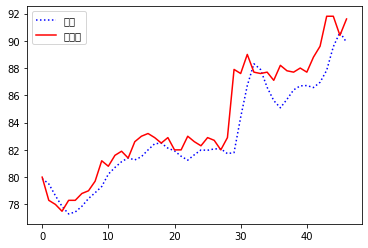

In [21]:
# 主程式
pd.options.mode.chained_assignment = None  #取消顯示pandas資料重設警告
f = 'twstockyear2020.csv'
df = pd.read_csv(f, encoding='big5')  #以pandas讀取檔案
ddprice=pd.DataFrame(df['Close'])
    
train_x, train_y, test_x, test_y, scaler =load_data(ddprice, sequence_length=10, split=0.8)
# train_x 共 230*0.8=184 筆, test_x 共 230*0.2=46 筆
print(train_x.shape,train_y.shape) # (184,10,1) (184,1)
print(test_x.shape,test_y.shape)   # (46,10,1)  (46,1)
predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
predict_y = scaler.inverse_transform([[i] for i in predict_y]) # 還原
test_y = scaler.inverse_transform(test_y)  # 還原

plt.plot(predict_y, 'b:') #預測
plt.plot(test_y, 'r-')    #收盤價
plt.legend(['預測', '收盤價'])
plt.show()

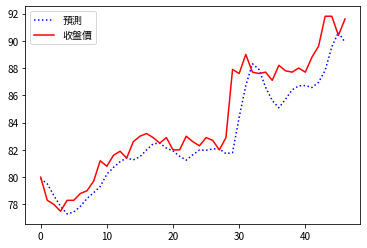

In [23]:
plt.plot(predict_y, 'b:') #預測
plt.plot(test_y, 'r-')    #收盤價
plt.legend(['預測', '收盤價'])
plt.show()

In [25]:
# 建立 DataFrame，加入 predict_y、test_y，準備以 plotly 繪圖
dd2=pd.DataFrame({"predict":list(predict_y),"label":list(test_y)})
#轉換為 numpy 陣列，並轉為 float
dd2["predict"] = np.array(dd2["predict"]).astype('float64')
dd2["label"] = np.array(dd2["label"]).astype('float64')

data = [Scatter(y=dd2["predict"],name='預測'),
        Scatter(y=dd2["label"],name='收盤價')] 

plot({"data": data, "layout": Layout(title='2020年個股預測圖')},auto_open=True)

'temp-plot.html'